# Abalone Project :-  DataTrained   |   Practice Project_4

## Problem Statement:

### Predict the rings of each abalone which will lead us to the age of that abalone. 

#### Submitted by: Tamali Saha (tamali428@gmail.com)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
# taking data from the given link on Github

data= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
#checking null values

data.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

No null value is present in the given dataset

In [4]:
#checking duplicate

data.duplicated().sum()

0

#### Adding age column in the dataframe 

Rings+1.5 gives the age in years.

In [5]:
data["Age"]= data["Rings"]+1.5
data.drop(columns= "Rings", axis= 1, inplace= True)
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [6]:
#checking shape

data.shape

(4177, 9)

In [7]:
#checking different statistical parameter

data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


### Data description by overviewing the data describe method:

1. No null values are present.
2. All of the features have numarical data except Sex column.
3. Sex column has categorical value. Need to encode this.
3. Target variable is 'Age' and it has continuous data. So it is a Regression problem.
4. For 'Height' column, min value is 0.
5. Seems some skewness are also present as there is a big jump between quantile and max value of 'Height', 'Shucked weight' and	'Shell weight' column.
6. All variable all features have float datatype.

In [9]:
# checking column name

data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Age'],
      dtype='object')

In [10]:
# renaming column

data.columns= ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Age']
data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


#### Replace Zero(0) Values

From data.describe() we can see that there exists some 0 value in hight column. This 0 value is probably a measurement error in the data so we have to deal with it.

Lets remove it.

In [11]:
(data.Height==0).sum()

2

In [12]:
data[data['Height']==0]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,9.5
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,7.5


There are 2 samples for which the value is 0 in the Height column.

The two empty values are in the infant gender (Sex_I).

replace it with the average value for the sex of infant (Sex_I).

In [13]:
mean= pd.pivot_table(data, index=["Sex"], aggfunc= {"Height": np.mean})

In [14]:
mean

,Height
Sex,
F,0.158011
I,0.107996
M,0.151381


In [15]:
data["Height"]= data["Height"].replace(to_replace=0, value=0.107996)

In [16]:
data.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139568,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041721,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


#### Sex Feature Analysis

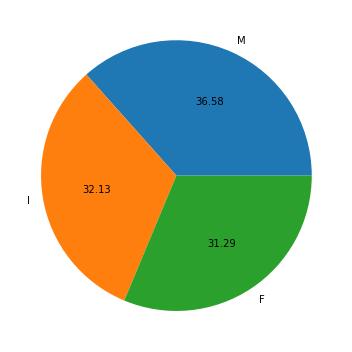

In [21]:
df= data["Sex"].value_counts(normalize= True)
df.plot(kind="pie", figsize=(5,5), ylabel='', autopct="%.2f" )
plt.tight_layout()
plt.show()

The 'sex' distribution is quite balanced, which is about 33% for each gender.

#### encoding Sex column

In [22]:
data_sex= pd.get_dummies(data[["Sex"]])

data= pd.concat ([data_sex,data], axis=1)
data.drop(columns= "Sex", axis= 1, inplace= True)
data.head()

,Sex_F,Sex_I,Sex_M,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,0,0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,1,0,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,0,0,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,0,1,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


#### Initially no null value is present in this dataset. There is no categorical feature also. So lets find the initial prediction with the raw data.

## Initial predictions using different models

### No hyperparameter tuning and Standarization technique for this steps

### Using LinearRegression()

In [23]:
from sklearn.linear_model import LinearRegression

x = data.drop(columns = ['Age'], axis=1)
y = data['Age']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=200)

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

y_pred = lin_reg.predict(x_test)

print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

print("-----------")
print("-----------")

print('training score : ', lin_reg.score(x_train, y_train))
print('testing score : ', lin_reg.score(x_test, y_test))


Mean absolute error: 1.610272129186603
Mean square error: 5.051597310481459
Root mean square error: 2.247575874243506
-----------
-----------
training score :  0.5436598657662335
testing score :  0.4910697037589622


### Using DecisionTreeRegressor()

In [24]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)

print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

print("-----------")
print("-----------")

print('training score : ', dt.score(x_train, y_train))
print('testing score : ', dt.score(x_test, y_test))

Mean absolute error: 2.0334928229665072
Mean square error: 8.674641148325358
Root mean square error: 2.9452743757289164
-----------
-----------
training score :  1.0
testing score :  0.12606104207044266


### Using KNeighborsRegressor()

In [25]:
from sklearn.neighbors import KNeighborsRegressor
knn =KNeighborsRegressor()
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

print("-----------")
print("-----------")

print('training score : ', knn.score(x_train, y_train))
print('testing score : ', knn.score(x_test, y_test))


Mean absolute error: 1.5249760765550238
Mean square error: 4.537492822966508
Root mean square error: 2.130139155775159
-----------
-----------
training score :  0.6694514673202105
testing score :  0.5428638854897492


### Using RandomForestRegressor()

In [26]:
from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

print("-----------")
print("-----------")

print('training score : ', rf.score(x_train, y_train))
print('testing score : ', rf.score(x_test, y_test))


Mean absolute error: 1.5339904306220096
Mean square error: 4.411048612440191
Root mean square error: 2.100249654788733
-----------
-----------
training score :  0.9344854978531666
testing score :  0.5556026858267438


### Check Data Distributions in details:

array([[<AxesSubplot:title={'center':'Sex_F'}>,
        <AxesSubplot:title={'center':'Sex_I'}>,
        <AxesSubplot:title={'center':'Sex_M'}>],
       [<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>],
       [<AxesSubplot:title={'center':'Whole_weight'}>,
        <AxesSubplot:title={'center':'Shucked_weight'}>,
        <AxesSubplot:title={'center':'Viscera_weight'}>],
       [<AxesSubplot:title={'center':'Shell_weight'}>,
        <AxesSubplot:title={'center':'Age'}>, <AxesSubplot:>]],
      dtype=object)

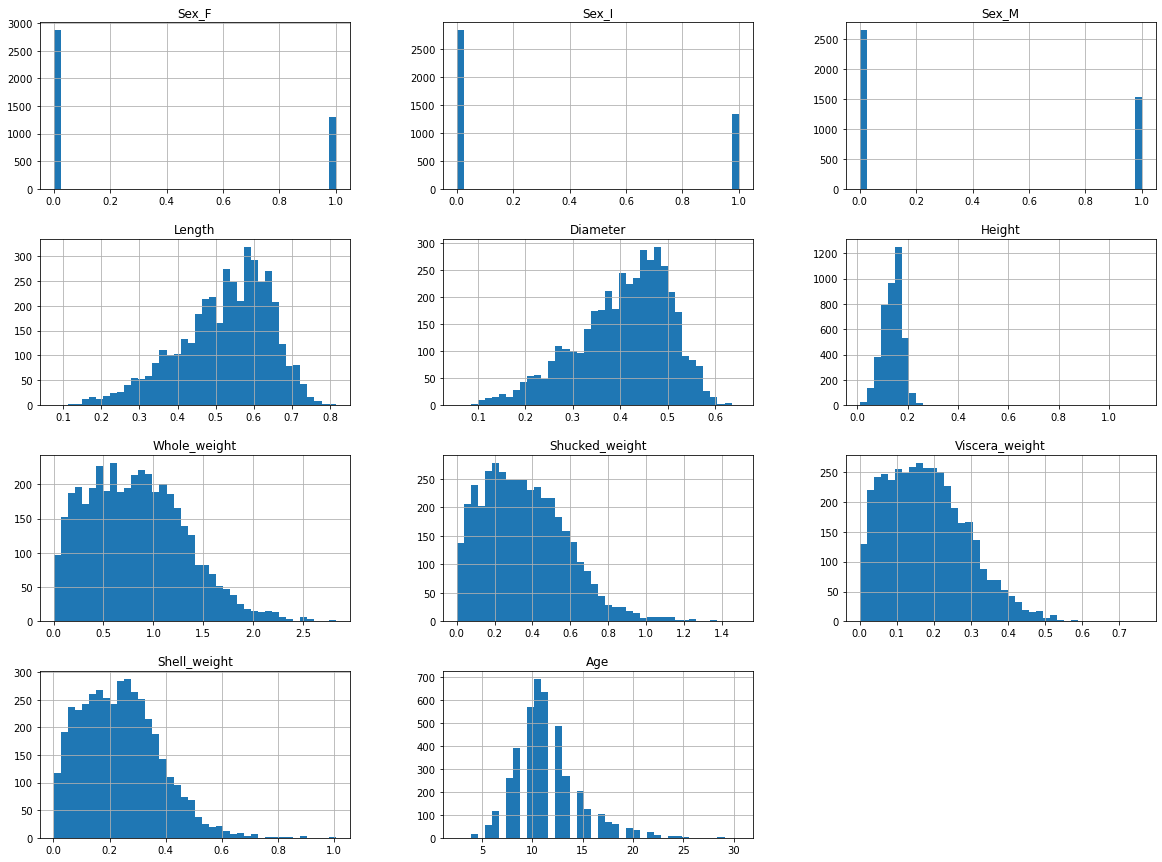

In [27]:
# checking the frequency distribution of the variables

data.hist(bins=40, figsize=(20, 15))

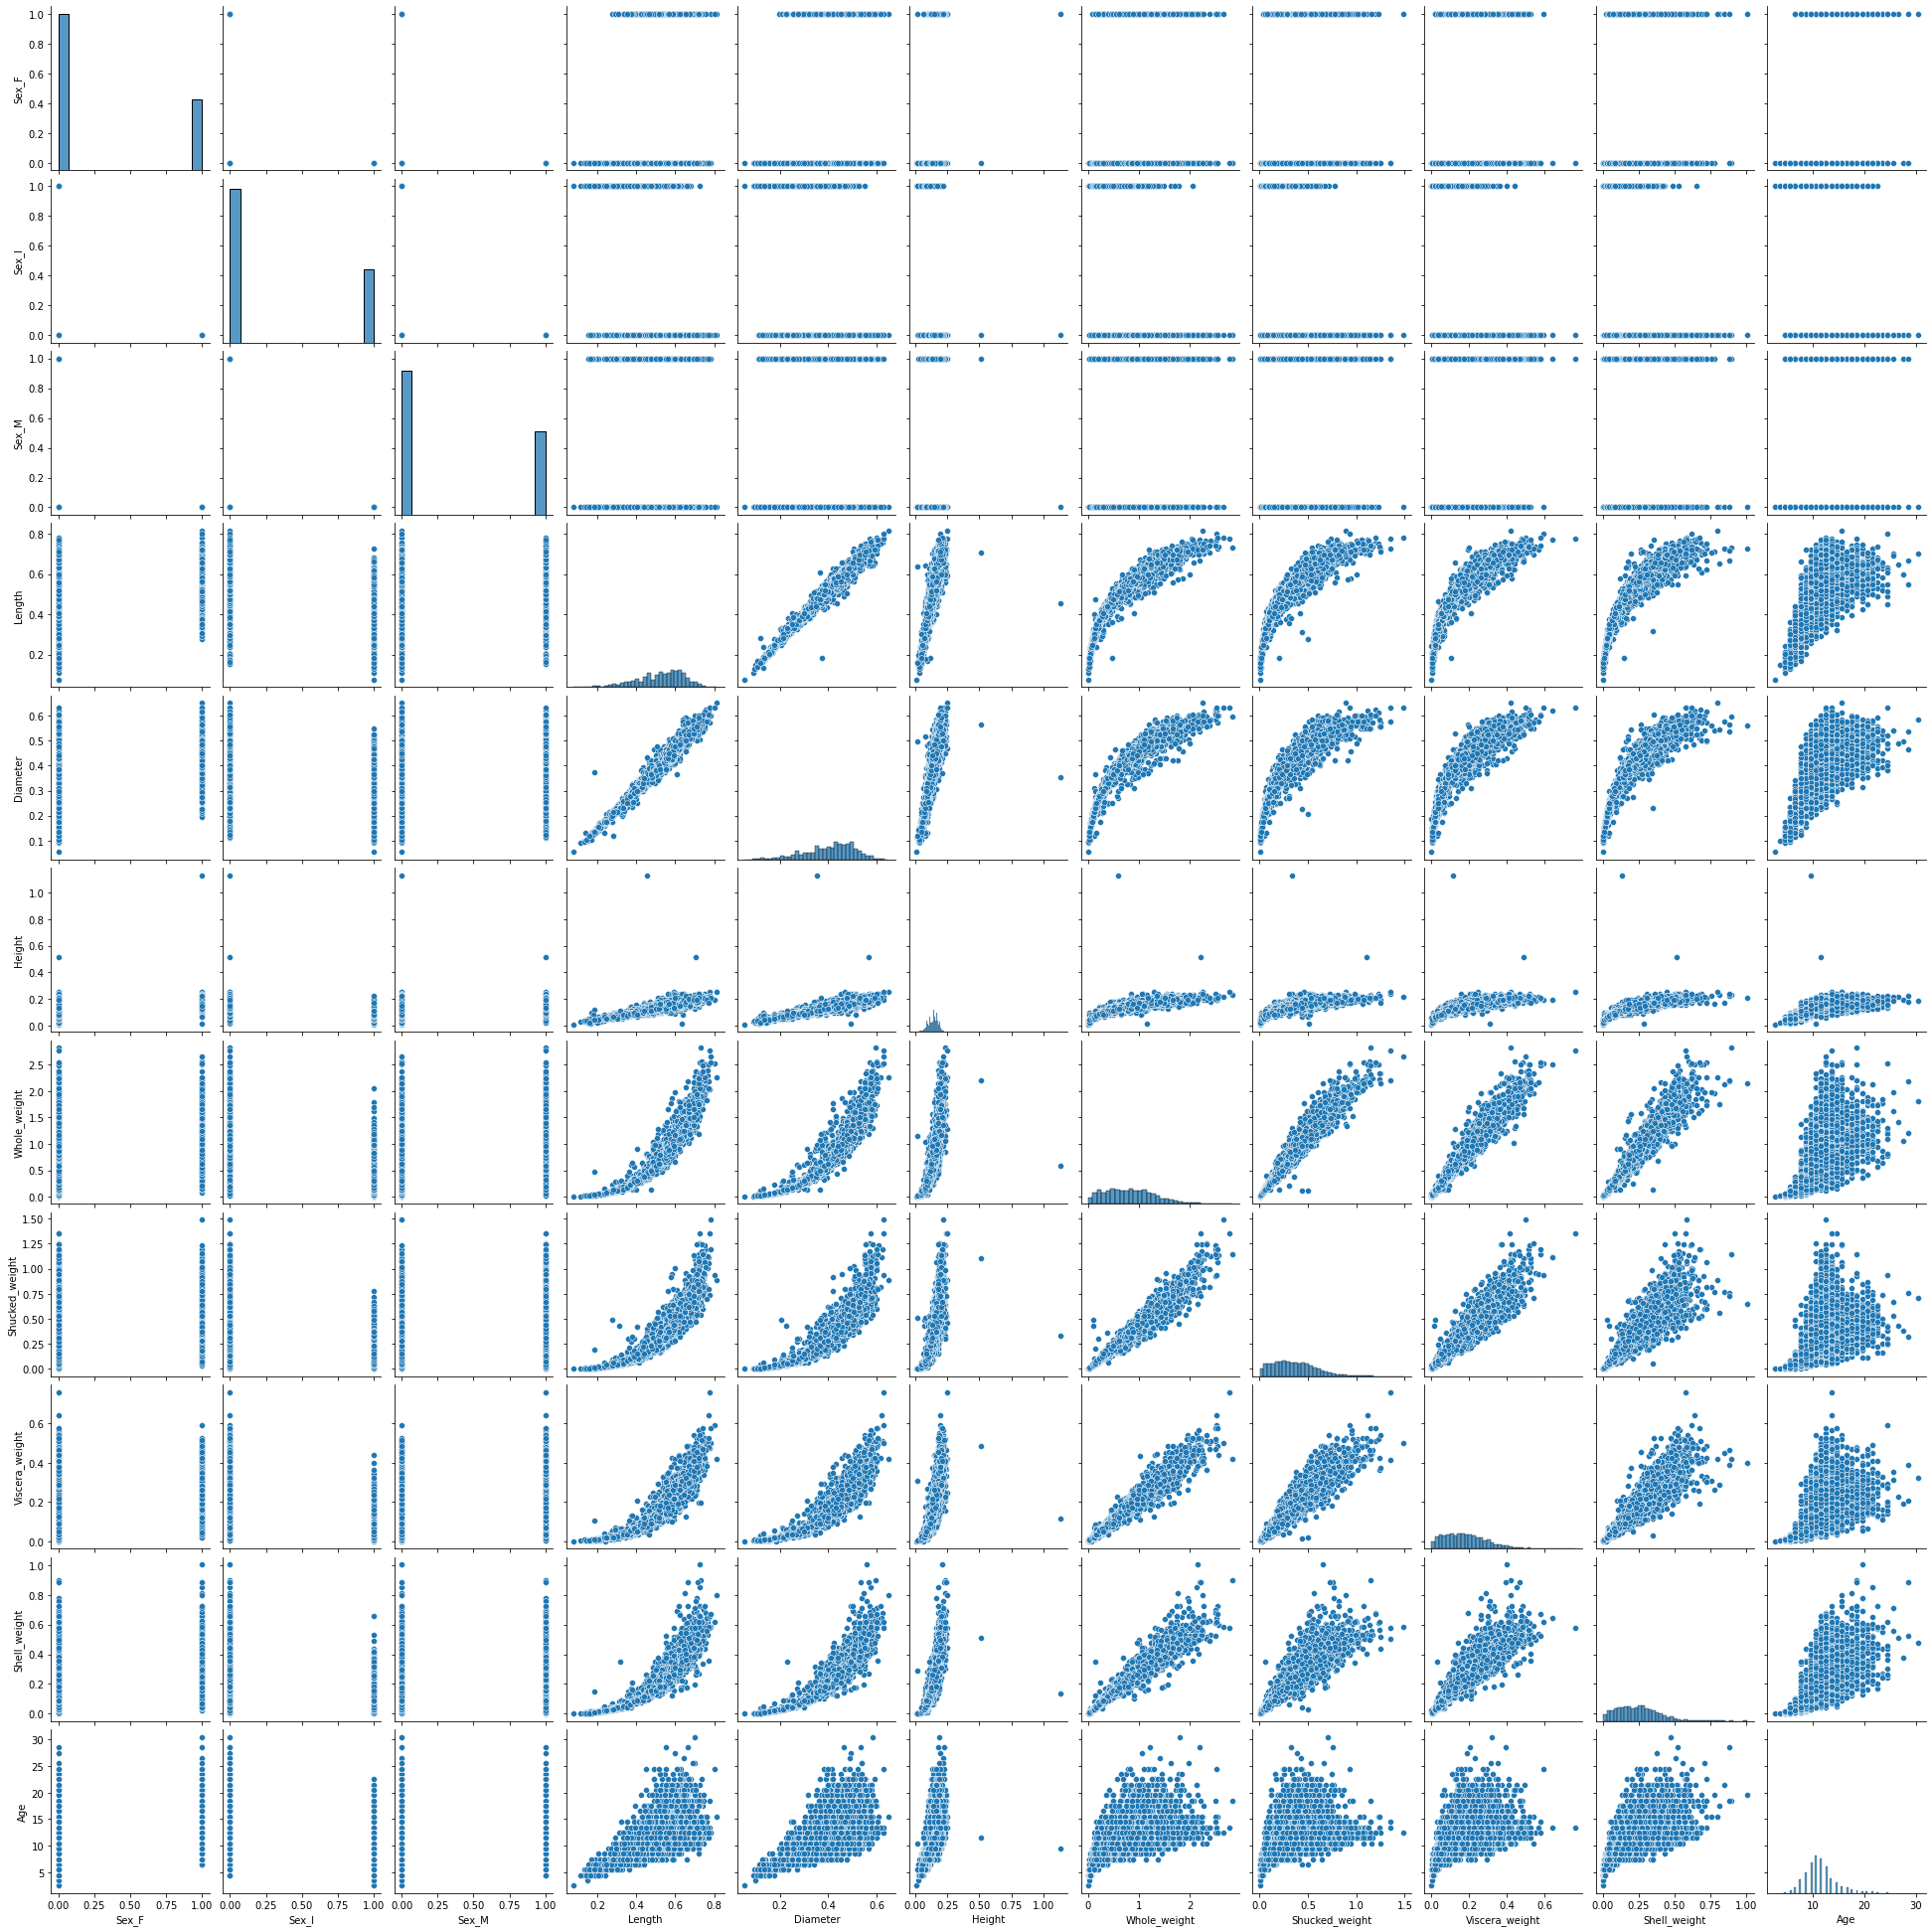

In [28]:
sns.pairplot(data)

<AxesSubplot:>

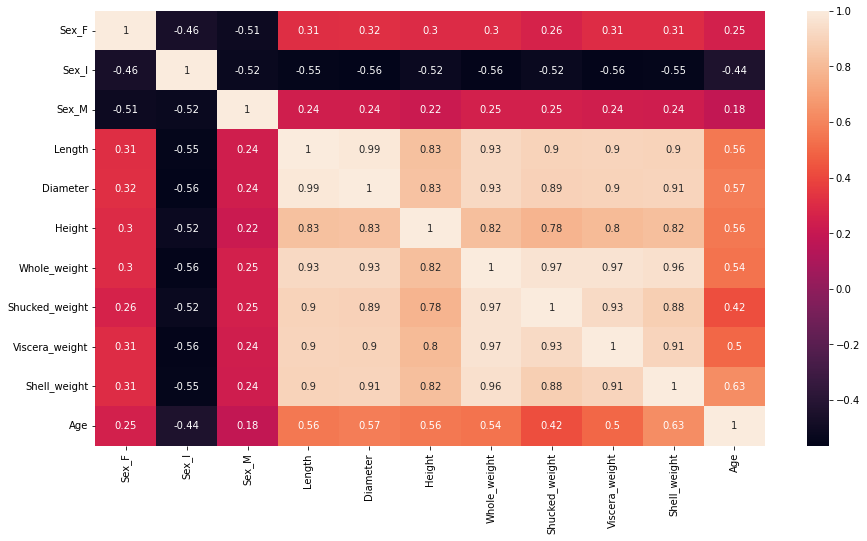

In [29]:
plt.subplots(figsize=(15,8))
sns.heatmap(data.corr(),annot= True, linecolor='black')

The lighter the box, the stronger/higher the correlation.

Each numerical feature has a linear correlation with the target.

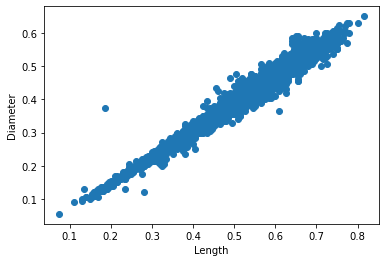

In [30]:
# seems Length  and Diameter is correlated. let's check

plt.scatter(data.Length, data.Diameter)
plt.xlabel("Length")
plt.ylabel("Diameter")
plt.show()

'Length', 'Diameter' is very strongly correlated with each other. Lets drop any one of them.

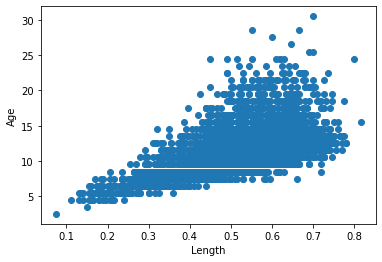

In [32]:
# Checking reln between Length, Age

plt.scatter(data.Length, data.Age)
plt.xlabel("Length")
plt.ylabel("Age")
plt.show()

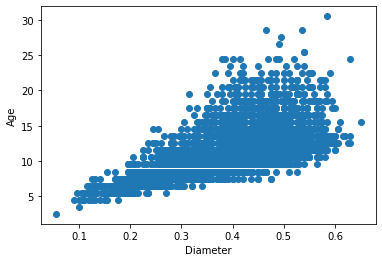

In [33]:
# Checking reln between Diameter, Age

plt.scatter(data.Diameter, data.Age)
plt.xlabel("Diameter")
plt.ylabel("Age")
plt.show()

There is a high correlation between Diameter and Length.

But the graph of the relationship between Diameter and Age, Lenghth and Age looks similar.

Both of it are highly correlated with Age.

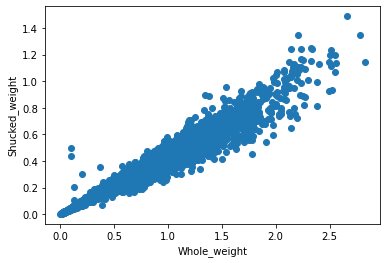

In [34]:
# seems 'Shucked_weight'  and 'Whole_weight' is correlated. let's check

plt.scatter(data.Whole_weight, data.Shucked_weight)
plt.xlabel("Whole_weight")
plt.ylabel("Shucked_weight")
plt.show()

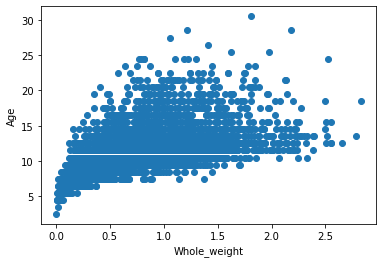

In [35]:
# Checking reln between Whole_weight, Age

plt.scatter(data.Whole_weight, data.Age)
plt.xlabel("Whole_weight")
plt.ylabel("Age")
plt.show()

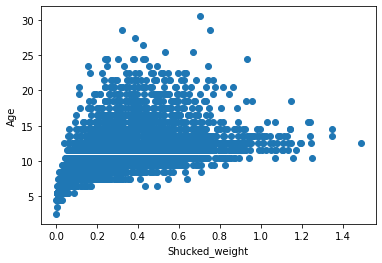

In [36]:
# Checking reln between Shucked_weight, Age

plt.scatter(data.Shucked_weight, data.Age)
plt.xlabel("Shucked_weight")
plt.ylabel("Age")
plt.show()

There is a high correlation between Whole_weight and Shucked_weight.

But the graph of the relationship between Whole_weight and Age, Shucked_weight and Age looks similar.

Both of it are highly correlated with Age.

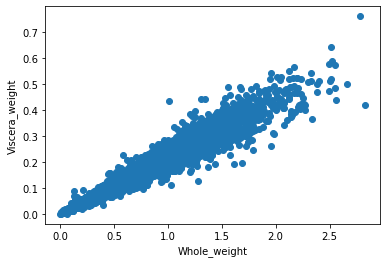

In [37]:
# seems 'Whole_weight'  and 'Viscera_weight' is correlated. let's check
plt.scatter(data.Whole_weight, data.Viscera_weight)
plt.xlabel("Whole_weight")
plt.ylabel("Viscera_weight")
plt.show()

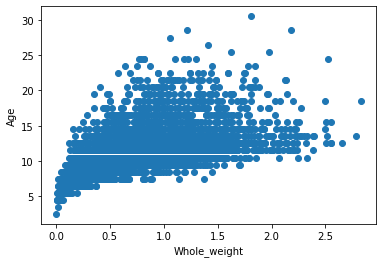

In [38]:
# Checking reln between Whole_weight, Age

plt.scatter(data.Whole_weight, data.Age)
plt.xlabel("Whole_weight")
plt.ylabel("Age")
plt.show()

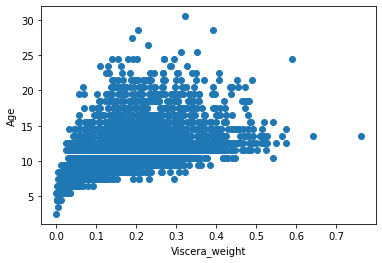

In [39]:
# Checking reln between Viscera_weight, Age

plt.scatter(data.Viscera_weight, data.Age)
plt.xlabel("Viscera_weight")
plt.ylabel("Age")
plt.show()

There is a high correlation between Whole_weight and Viscera_weight.

But the graph of the relationship between Whole_weight and Age, Viscera_weight and Age looks similar.

Both of it are highly correlated with Age.

#### Checking Skewness

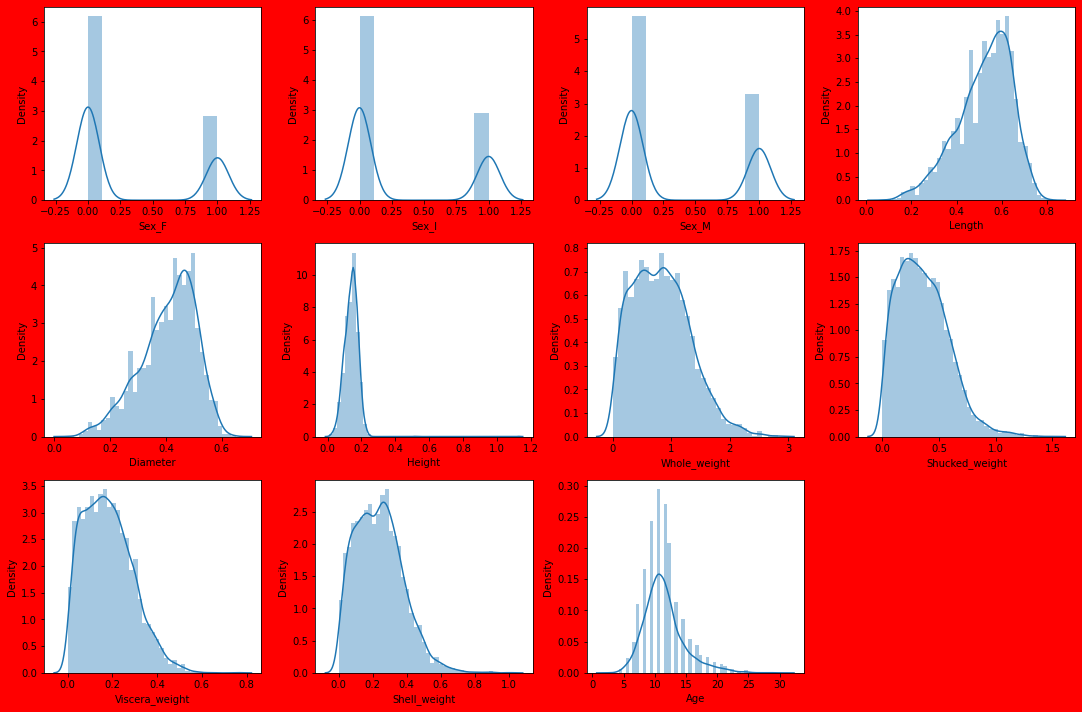

In [40]:
plt.figure(figsize=(15,10),facecolor='red')
plno=1
for x in data:
    if plno<=11:
        plt.subplot(3,4,plno)
        sns.distplot(data[x])
        plt.xlabel (x, fontsize=10)
    plno +=1
plt.tight_layout()

Sex_F                AxesSubplot(0.125,0.536818;0.110714x0.343182)
Sex_I             AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Sex_M             AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Length            AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Diameter          AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Height            AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Whole_weight            AxesSubplot(0.125,0.125;0.110714x0.343182)
Shucked_weight       AxesSubplot(0.257857,0.125;0.110714x0.343182)
Viscera_weight       AxesSubplot(0.390714,0.125;0.110714x0.343182)
Shell_weight         AxesSubplot(0.523571,0.125;0.110714x0.343182)
Age                  AxesSubplot(0.656429,0.125;0.110714x0.343182)
dtype: object

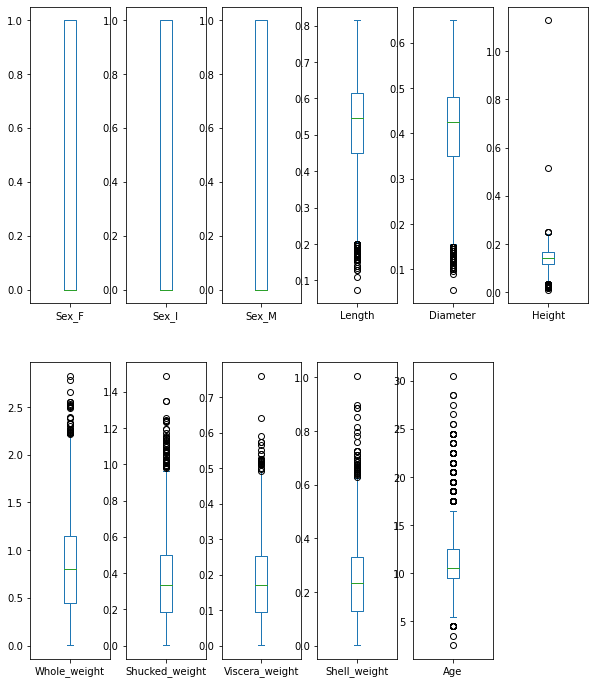

In [41]:
data.plot(kind ='box', subplots =True , layout =(2,6), figsize = (10,12) )

This dataset has some skewness and outliers.

The number of outliers is the possibility that the data is not normally distributed.

#### Target variable "Age" has also outliers.

#### Lets take the zscore and assumed that any data value which is greater than zscore value 3 are outliers. By this way we try to minimize the overall skewness as well as outliers.

In [42]:
from scipy.stats import zscore
z = np.abs(zscore(data))
data_new = data[(z<3).all(axis = 1)]
data_new

,Sex_F,Sex_I,Sex_M,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,0,0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,1,0,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,0,0,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,0,1,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...,...,...
4172,1,0,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,0,0,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,0,0,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,1,0,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


Sex_F                AxesSubplot(0.125,0.657941;0.168478x0.222059)
Sex_I             AxesSubplot(0.327174,0.657941;0.168478x0.222059)
Sex_M             AxesSubplot(0.529348,0.657941;0.168478x0.222059)
Length            AxesSubplot(0.731522,0.657941;0.168478x0.222059)
Diameter             AxesSubplot(0.125,0.391471;0.168478x0.222059)
Height            AxesSubplot(0.327174,0.391471;0.168478x0.222059)
Whole_weight      AxesSubplot(0.529348,0.391471;0.168478x0.222059)
Shucked_weight    AxesSubplot(0.731522,0.391471;0.168478x0.222059)
Viscera_weight          AxesSubplot(0.125,0.125;0.168478x0.222059)
Shell_weight         AxesSubplot(0.327174,0.125;0.168478x0.222059)
Age                  AxesSubplot(0.529348,0.125;0.168478x0.222059)
dtype: object

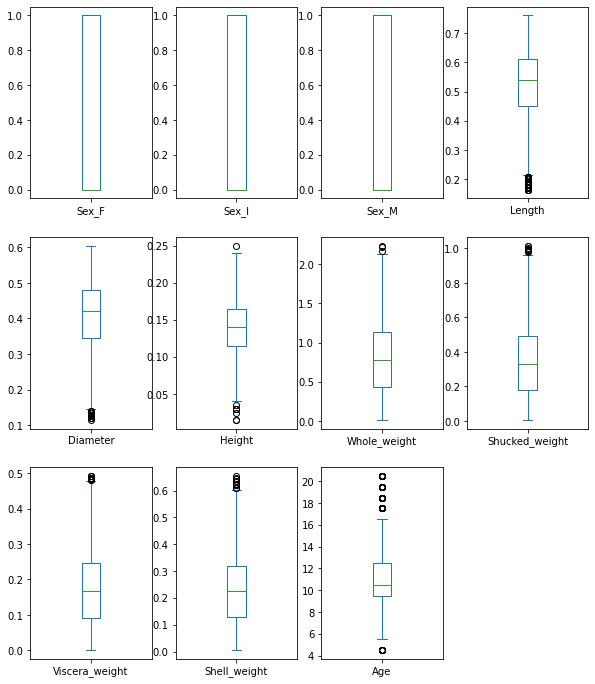

In [43]:
data_new.plot(kind ='box', subplots =True , layout =(3,4), figsize = (10,12))

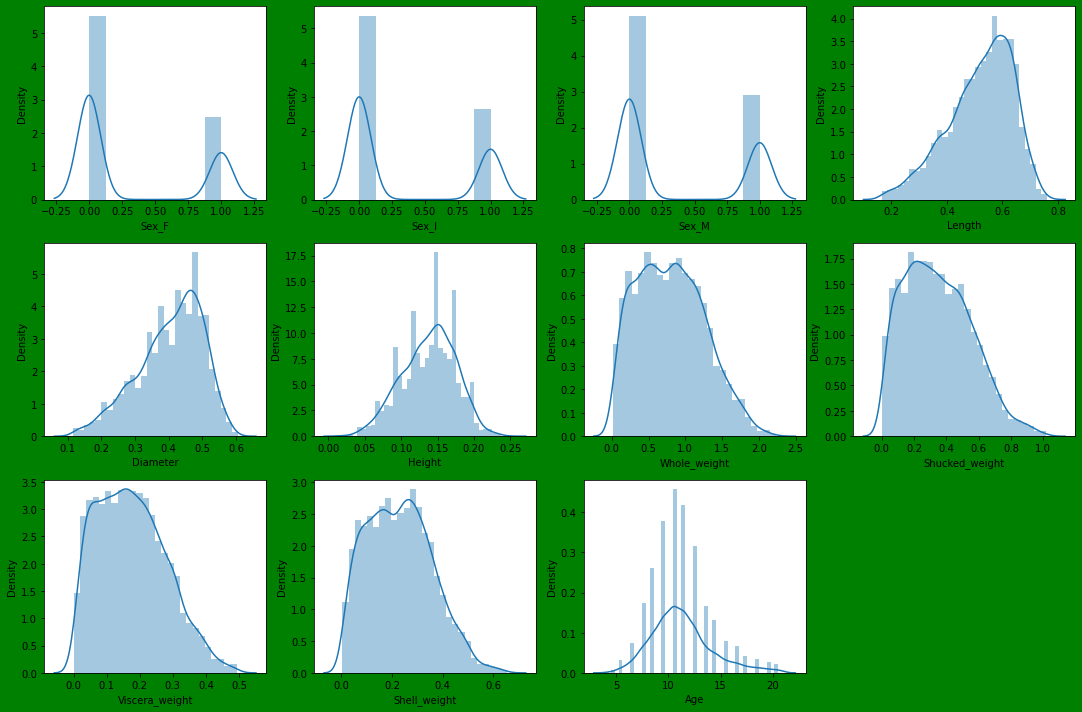

In [44]:
plt.figure(figsize=(15,10),facecolor='green')
plno=1
for x in data_new:
    if plno<=11:
        plt.subplot(3,4,plno)
        sns.distplot(data_new[x])
        plt.xlabel (x, fontsize=10)
    plno +=1
plt.tight_layout()

#### overall skewness is removed by selecting z score=3

### Checking Multicollinearity

In [45]:
scaler= StandardScaler()

x = data_new.drop(columns = ['Age'], axis=1)
y = data_new['Age']

x_scale= scaler.fit_transform(x)
x_scale.shape

(4029, 10)

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif["VIF"]= [variance_inflation_factor(x_scale,i)for i in range(x_scale.shape[1])]
vif["Features"] = x.columns
vif

,VIF,Features
0,inf,Sex_F
1,inf,Sex_I
2,inf,Sex_M
3,39.194210,Length
4,40.805262,Diameter
5,6.579271,Height
6,106.334013,Whole_weight
7,28.344336,Shucked_weight
8,17.105159,Viscera_weight
9,22.777368,Shell_weight


For this particular dataset, every feature is highly correlated with another feature.

Let's keep all the features because there is a chance of data loose after deleting any feature for multicollinearity.

There is some skewness. First scale the features with MinMaxScaler then use it for building models.

So, lets move forward for model prediction.

## Final predictions using different Regression ML Models 

### Using LinearRegression() and Data Standarization

In [48]:
from sklearn.preprocessing import MinMaxScaler

minscaler= MinMaxScaler()

x= data_new.drop('Age', axis=1)
y= data_new["Age"]

x_scale = minscaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size=0.25, random_state=200)

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

y_pred = lin_reg.predict(x_test)

print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

print("-----------")
print("-----------")

print('training score : ', lin_reg.score(x_train, y_train))
print('testing score : ', lin_reg.score(x_test, y_test))

Mean absolute error: 1.4352775452628967
Mean square error: 3.7144085755423895
Root mean square error: 1.9272800978431728
-----------
-----------
training score :  0.529888701818832
testing score :  0.5043796848528432


#### Using GridSearchCV

In [49]:
from sklearn.model_selection import GridSearchCV

grid = dict(fit_intercept=['True', 'False'], n_jobs=[1,-1])

grid_lin = GridSearchCV(estimator=lin_reg, param_grid= grid, n_jobs=-1, cv=5)

grid_lin.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'fit_intercept': ['True', 'False'], 'n_jobs': [1, -1]})

In [50]:
grid_lin.best_params_

{'fit_intercept': 'True', 'n_jobs': 1}

In [51]:
grid_lin_best = LinearRegression(fit_intercept= 'True')

grid_lin_best.fit(x_train, y_train)
y_pred = grid_lin_best.predict(x_test)

In [52]:
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

print("-----------")
print("-----------")

print('training score : ', grid_lin_best.score(x_train, y_train))
print('testing score : ', grid_lin_best.score(x_test, y_test))

Mean absolute error: 1.4352775452628967
Mean square error: 3.7144085755423895
Root mean square error: 1.9272800978431728
-----------
-----------
training score :  0.529888701818832
testing score :  0.5043796848528432


### Using DecisionTreeRegressor() and Standarization

In [53]:
from sklearn.preprocessing import MinMaxScaler

minscaler= MinMaxScaler()

x= data_new.drop('Age', axis=1)
y= data_new["Age"]

x_scale = minscaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size=0.25, random_state=200)

dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)

print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

print("-----------")
print("-----------")

print('training score : ', dt.score(x_train, y_train))
print('testing score : ', dt.score(x_test, y_test))

Mean absolute error: 1.880952380952381
Mean square error: 7.003968253968254
Root mean square error: 2.646501134322117
-----------
-----------
training score :  1.0
testing score :  0.06544773341055088


#### Using GridSearchCV

In [54]:
param = {'criterion' : ["squared_error", "friedman_mse", "absolute_error"],
    'max_depth' : range(15,30),
    'min_samples_split' : range(1,4),
    'splitter' : ["best", "random"],
    'min_samples_leaf' : range(1,3)}

grid_search = GridSearchCV(estimator = dt, cv=7,param_grid = param, n_jobs = -1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=7, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': range(15, 30),
                         'min_samples_leaf': range(1, 3),
                         'min_samples_split': range(1, 4),
                         'splitter': ['best', 'random']})

In [55]:
grid_search.best_params_

{'criterion': 'absolute_error',
 'max_depth': 15,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'random'}

In [56]:
grid_dt_best = DecisionTreeRegressor(criterion='squared_error',max_depth = 15, min_samples_leaf=2, min_samples_split= 2,splitter = 'random')

grid_dt_best.fit(x_train, y_train)

y_pred = grid_dt_best.predict(x_test)

print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

print("-----------")
print("-----------")

print('training score : ', grid_dt_best.score(x_train, y_train))
print('testing score : ', grid_dt_best.score(x_test, y_test))

Mean absolute error: 1.7054647007037032
Mean square error: 5.54318224989132
Root mean square error: 2.3543963663519616
-----------
-----------
training score :  0.8220944278338385
testing score :  0.2603630759149618


### Using KNeighborsRegressor() and Data Standarization

In [57]:
minscaler= MinMaxScaler()

x= data_new.drop('Age', axis=1)
y= data_new["Age"]

x_scale = minscaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size=0.25, random_state=200)

knn =KNeighborsRegressor()
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

print("-----------")
print("-----------")

print('training score : ', knn.score(x_train, y_train))
print('testing score : ', knn.score(x_test, y_test))


Mean absolute error: 1.398611111111111
Mean square error: 3.670753968253968
Root mean square error: 1.9159211800734308
-----------
-----------
training score :  0.6479891941153496
testing score :  0.5102045987743693


#### Using GridSearchCV

In [58]:
param = {'algorithm' : ['kd_tree','brute'],
             'leaf_size' : [30,12,15,34,10], 'n_jobs':[1,-1],
             'n_neighbors' : [11,13,9,5],'weights': ['uniform', 'distance']}
    

gridsearchknn = GridSearchCV(estimator = knn, param_grid=param, n_jobs=-1, cv=10)

gridsearchknn.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [30, 12, 15, 34, 10], 'n_jobs': [1, -1],
                         'n_neighbors': [11, 13, 9, 5],
                         'weights': ['uniform', 'distance']})

In [59]:
gridsearchknn.best_params_

{'algorithm': 'kd_tree',
 'leaf_size': 30,
 'n_jobs': 1,
 'n_neighbors': 13,
 'weights': 'distance'}

In [60]:
knngrid = KNeighborsRegressor(algorithm ='kd_tree', leaf_size=30, n_neighbors = 13, n_jobs= 1,weights= 'distance' )

knngrid.fit(x_train,y_train)
y_pred = knngrid.predict(x_test)


In [61]:
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

print("-----------")
print("-----------")

print('training score : ', knngrid.score(x_train, y_train))
print('testing score : ', knngrid.score(x_test, y_test))

Mean absolute error: 1.3629579844728967
Mean square error: 3.5496272116006846
Root mean square error: 1.8840454377749716
-----------
-----------
training score :  1.0
testing score :  0.5263667629747595


### Using RandomForestRegressor() and Data Standarization

In [62]:
minscaler= MinMaxScaler()

x= data_new.drop('Age', axis=1)
y= data_new["Age"]

x_scale = minscaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size=0.25, random_state=200)

rf= RandomForestRegressor()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

print("-----------")
print("-----------")

print('training score : ', rf.score(x_train, y_train))
print('testing score : ', rf.score(x_test, y_test))

Mean absolute error: 1.3710615079365076
Mean square error: 3.4239568452380955
Root mean square error: 1.8503937000644202
-----------
-----------
training score :  0.9347409556348951
testing score :  0.543135189310893


#### Using GridSearchCV

params = {'n_estimators' : [100,110,80],
          'criterion' : ["squared_error", "absolute_error"],
         'min_samples_split' : [3,2,1], 'n_jobs': [1,-1],
         'min_samples_leaf' : [1,2]}

rf_grd = GridSearchCV(rf, param_grid = params)

rf_grd.fit(x_train, y_train)

print('best params : ', rf_grd.best_params_)

rf_best = rf_grd.best_estimator_
rf_best.fit(x_train, y_train)

y_pred = rf_best.predict(x_test)

print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

print("-----------")
print("-----------")

print('training score : ', rf_best.score(x_train, y_train))
print('testing score : ', rf_best.score(x_test, y_test))

#### could not able to fetch the above code in my system. After running it take above 1 hr but still not processed.
#### No GridSearchCV done with RandomForestRegressor()

### Using Support Vector Regression() and Data Standarization

In [64]:
from sklearn.svm import SVR

minscaler= MinMaxScaler()

x= data_new.drop('Age', axis=1)
y= data_new["Age"]

x_scale = minscaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size=0.25, random_state=200)

svr = SVR()
svr.fit(x_train, y_train)

y_pred = svr.predict(x_test)

print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

print("-----------")
print("-----------")

print('training score : ', svr.score(x_train, y_train))
print('testing score : ', svr.score(x_test, y_test))


Mean absolute error: 1.352044428110014
Mean square error: 3.6514541233079187
Root mean square error: 1.9108778410217433
-----------
-----------
training score :  0.5147624662175472
testing score :  0.5127798123083451


#### Using GridSearchCV

In [65]:
params = {'kernel':['rbf','linear', 'poly'], 'gamma':['scale', 'auto'],'C':[1.0,10,100] }

svr_grd = GridSearchCV(svr, param_grid = params, cv= 7)

svr_grd.fit(x_train, y_train)

GridSearchCV(cv=7, estimator=SVR(),
             param_grid={'C': [1.0, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear', 'poly']})

In [66]:
svr_best = svr_grd.best_estimator_
svr_best.fit(x_train, y_train)

y_pred = svr_best.predict(x_test)

print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

print("-----------")
print("-----------")

print('training score : ', svr_best.score(x_train, y_train))
print('testing score : ', svr_best.score(x_test, y_test))

Mean absolute error: 1.3221420701861282
Mean square error: 3.454323516595075
Root mean square error: 1.8585810492402732
-----------
-----------
training score :  0.5765964414505224
testing score :  0.5390833089316004


Here for this problem we can see that, the models with better accuracy are SVR() and RandomForestRegressor(). 

For Support Vector Regression():

Mean absolute error: 1.3221420701861282
Mean square error: 3.454323516595075
Root mean square error: 1.8585810492402732

-----------
-----------
training score :  0.5765964414505224
testing score :  0.5390833089316004

For RandomForestRegressor():

Mean absolute error: 1.3710615079365076
Mean square error: 3.4239568452380955
Root mean square error: 1.8503937000644202

-----------
-----------
training score :  0.9347409556348951
testing score :  0.543135189310893


As RandomForestRegressor() has a variation between training and testing score so here the acceptable model is Support Vector Regression().

#### For this case the best model is Support Vector Regression() with GridSearchCV.

In [69]:
# making predictions on the test data
y_pred = svr_best.predict(x_test)
y_pred

array([14.97246719, 10.70712698, 14.64498405, ..., 10.0219377 ,
       13.0967327 , 11.16008295])

In [70]:
len(y_pred)

1008

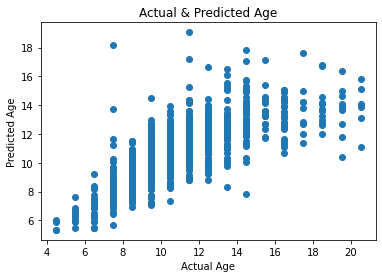

In [72]:
# Let's visualize the variation of actual test data and predicted data

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title("Actual & Predicted Age")
plt.show()

In [73]:
# Print MSE, MAE, RMSE

print ("MSE", mean_squared_error(y_test, y_pred))
print ("MAE", mean_absolute_error(y_test, y_pred))
print("RMSE", np.sqrt (mean_squared_error(y_test, y_pred)))

MSE 3.454323516595075
MAE 1.3221420701861282
RMSE 1.8585810492402732


### Load and save the model
Now , let's save the model for future use.

In [76]:
import pickle
pickle.dump(svr_best, open("Abalone_Regression_model", "wb"))

load_Abalone_Regression_model= pickle.load(open("Abalone_Regression_model", "rb"))

In [77]:
# Use "load_red_wine_classification_model" for nexttime use

load_Abalone_Regression_model.score(x_test, y_test)

0.5390833089316004